<a href="https://colab.research.google.com/github/shivi123g/-Anonymous-/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Startup

In [ ]:
import numpy as np
import pandas as pd
import random
import hashlib
import collections
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
master_dir = "/content/drive/MyDrive/DSc_assignments/assignment-1"
master_dir

'/content/drive/MyDrive/DSc_assignments/assignment-1'

# Part-1

In [ ]:
file_path = f"{master_dir}/words.txt"
file_path

'/content/drive/MyDrive/DSc_assignments/assignment-1/words.txt'

Part a)

In [ ]:

class UniversalHashTable:
    P = 524287

    def __init__(self, m):
        self.m = m
        self.B = [[] for i in range(self.m)]
        self.a = random.randint(1, self.P - 1)

    def _hash_function(self, x):
        x_int = int(x)
        intermediate_hash = (self.a * x_int) % self.P
        bucket_index = intermediate_hash % self.m

        return bucket_index

    def insert(self, key, value=None):
        bucket_index = self._hash_function(key)
        self.B[bucket_index].append((key, value))

    def get_chain_length(self, key):

        bucket_index = self._hash_function(key)
        return len(self.B[bucket_index])

    def get_all_chain_lengths(self):
        return [len(chain) for chain in self.B]

Part b)

In [ ]:

def hash_word_md5(word):
    word_bytes = word.encode('utf-8')
    md5_hash = hashlib.md5(word_bytes).hexdigest()
    last_four_hex = md5_hash[-4:]
    bucket_index = int(last_four_hex, 16)

    return bucket_index


Part c)

In [ ]:

M = 500000
NUM_EXPERIMENTS = 5

def run_chain_length_experiment(hash_func_name, hash_function, m):
    bucket_counts = [0] * m
    for x in range(1, m + 1):
        bucket_index = hash_function(x)
        bucket_counts[bucket_index] += 1

    max_chain = max(bucket_counts)
    min_chain = min(bucket_counts)

    return max_chain, min_chain, max_chain - min_chain

def random_hash_function(m):
    def random_hash(x):
        return int(m * random.random())

    return run_chain_length_experiment('Random Hash', random_hash, m)

def universal_hash_function(m):
    ht = UniversalHashTable(m)

    def universal_hash(x):
        return ht._hash_function(x)

    return run_chain_length_experiment('Universal Hash', universal_hash, m)

results = []
for i in range(1, NUM_EXPERIMENTS + 1):
    max_uni, min_uni, diff_uni = universal_hash_function(M)
    results.append({
        'Experiment': i,
        'Hash Function': 'Universal',
        'Max Chain': max_uni,
        'Min Chain': min_uni,
        'Difference': diff_uni
    })

    max_rand, min_rand, diff_rand = random_hash_function(M)
    results.append({
        'Experiment': i,
        'Hash Function': 'Random',
        'Max Chain': max_rand,
        'Min Chain': min_rand,
        'Difference': diff_rand
    })

df = pd.DataFrame(results)
print(df.to_markdown(index=False))


avg_diff = df.groupby('Hash Function')['Difference'].mean().sort_values(ascending=False)
print(avg_diff.to_markdown())


|   Experiment | Hash Function   |   Max Chain |   Min Chain |   Difference |
|-------------:|:----------------|------------:|------------:|-------------:|
|            1 | Universal       |           2 |           0 |            2 |
|            1 | Random          |           8 |           0 |            8 |
|            2 | Universal       |           2 |           0 |            2 |
|            2 | Random          |           8 |           0 |            8 |
|            3 | Universal       |           2 |           0 |            2 |
|            3 | Random          |           9 |           0 |            9 |
|            4 | Universal       |           2 |           0 |            2 |
|            4 | Random          |           8 |           0 |            8 |
|            5 | Universal       |           2 |           0 |            2 |
|            5 | Random          |           9 |           0 |            9 |
| Hash Function   |   Difference |
|:----------------|----------

In [ ]:

def count_trailing_zeros(n):
    if n == 0:
        return 0
    return int(math.log2(n & -n))


def flajolet_martin_estimate(ids, m):
    ht = UniversalHashTable(m)
    z_max = 0

    for current_id in ids:
        y = ht._hash_function(current_id)
        rho_y = count_trailing_zeros(y)

        if rho_y > z_max:
            z_max = rho_y

    estimate = 2**(z_max + 0.5)

    return z_max, estimate

all_ids = []
unique_words = set()


try:
    with open(file_path, 'r') as f:
        for line in f:
            word = line.strip()
            if word:
                word_id = hash_word_md5(word)
                all_ids.append(word_id)
                unique_words.add(word)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    all_ids = []

TRUE_UNIQUE_COUNT = len(unique_words)

if all_ids:
    M_values = [2**10, 2**12, 2**14, 2**16, 2**18]
    fm_results = []
    for m in M_values:
        z_max, estimate = flajolet_martin_estimate(all_ids, m)
        fm_results.append({
            'm': f'2^{{{int(math.log2(m))}}}',
            'Max Trailing Zeros': z_max,
            'Estimate = 2^{z_max + 1/2}': estimate
        })

    df_fm = pd.DataFrame(fm_results)
    print("\n--- Flajolet-Martin Unique Word Estimation (Part d) ---")
    print(df_fm.to_markdown(index=False))


--- Flajolet-Martin Unique Word Estimation (Part d) ---
| m      |   Max Trailing Zeros |   Estimate = 2^{z_max + 1/2} |
|:-------|---------------------:|-----------------------------:|
| 2^{10} |                    9 |                      724.077 |
| 2^{12} |                   11 |                     2896.31  |
| 2^{14} |                   13 |                    11585.2   |
| 2^{16} |                   13 |                    11585.2   |
| 2^{18} |                   15 |                    46341     |


# Part-2

Dataset link: https://archive.ics.uci.edu/dataset/352/online+retail

It is the Online Retail Dataset from the UCI Machine Learning Repository.

In [ ]:
data_file_path = f"{master_dir}/Online Retail.xlsx"
data_file_path

'/content/drive/MyDrive/DSc_assignments/assignment-1/Online Retail.xlsx'

In [ ]:
df = pd.read_excel(data_file_path, sheet_name="Online Retail")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Some descriptions are empty

In [ ]:
df["Description"].isnull().sum()

np.int64(1454)

In [ ]:
df[df["Description"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


Some CustomerIDs are empty

In [ ]:
df["CustomerID"].isnull().sum()

np.int64(135080)

In [ ]:
df[df["CustomerID"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


## Part a)

In [ ]:
import hashlib
import random
import string
from tqdm import tqdm
from collections import Counter, defaultdict

# Convert StockCode to strings
df['StockCode'] = df['StockCode'].astype(str)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
unique_items = df['StockCode'].unique().tolist()
n_unique = len(unique_items)
print(f"Unique StockCode items: {n_unique}")

Unique StockCode items: 4070


In [ ]:
class BloomFilter:
    def __init__(self, m, k):
        """
        m: number of bits
        k: number of hash functions
        """
        self.m = int(m)
        self.k = int(k)
        self.bit_array = np.zeros(self.m, dtype=bool)
        # Use k different salted hashes based on hashlib.sha256
        self.salts = [f"salt{i}" for i in range(self.k)]

    def _hashes(self, item):
        item_b = item.encode('utf-8')
        for s in self.salts:
            h = hashlib.sha256(s.encode('utf-8') + item_b).digest()
            # convert digest to integer
            yield int.from_bytes(h, 'big') % self.m

    def add(self, item):
        for pos in self._hashes(item):
            self.bit_array[pos] = True

    def __contains__(self, item):
        return all(self.bit_array[pos] for pos in self._hashes(item))

In [ ]:
def generate_absent_items(existing_set, x):
    # Create strings that are unlikely to exist, e.g., random alpha-numeric codes.
    absent = set()
    while len(absent) < x:
        s = 'ZZ' + ''.join(random.choices(string.ascii_uppercase + string.digits, k=6))
        if s not in existing_set:
            absent.add(s)
    return list(absent)

In [ ]:
def bloom_experiments(unique_items, m_values, k_values, x_values, fixed_params):
    """
    unique_items: list of item strings
    m_values: list of m to sweep
    k_values: list of k to sweep
    x_values: list of x (numbers of queries for present/absent)
    fixed_params: dict for which graphs to produce:
       - 'graph1': fixed_x and fixed_k -> sweep m
       - 'graph2': fixed_x and fixed_m -> sweep k
       - 'graph3': fixed_k and fixed_m -> sweep x
    Returns: results dict for plotting
    """
    results = dict()

    existing_set = set(unique_items)
    # we'll sample present items from unique_items
    for graph_name in ['graph1', 'graph2', 'graph3']:
        results[graph_name] = []

    # Graph 1: m (x-axis) vs FPR, fixed x and k
    fixed_x = fixed_params['graph1']['x']
    fixed_k = fixed_params['graph1']['k']
    for m in m_values:
        bf = BloomFilter(m=m, k=fixed_k)
        for it in unique_items:
            bf.add(it)
        # sample present
        present_samples = random.sample(unique_items, fixed_x)
        # ensure sensitivity = 1 (no false negative)
        false_neg = sum(1 for s in present_samples if not (s in bf))
        # sample absent
        absent_samples = generate_absent_items(existing_set, fixed_x)
        false_pos = sum(1 for s in absent_samples if (s in bf))
        fpr = false_pos / fixed_x
        results['graph1'].append({'m': m, 'fpr': fpr, 'false_neg': false_neg, 'k': fixed_k, 'x': fixed_x})

    # Graph 2: k (x-axis) vs FPR, fixed x and m
    fixed_x = fixed_params['graph2']['x']
    fixed_m = fixed_params['graph2']['m']
    for k in k_values:
        bf = BloomFilter(m=fixed_m, k=k)
        for it in unique_items:
            bf.add(it)
        present_samples = random.sample(unique_items, fixed_x)
        false_neg = sum(1 for s in present_samples if not (s in bf))
        absent_samples = generate_absent_items(existing_set, fixed_x)
        false_pos = sum(1 for s in absent_samples if (s in bf))
        fpr = false_pos / fixed_x
        results['graph2'].append({'k': k, 'fpr': fpr, 'false_neg': false_neg, 'm': fixed_m, 'x': fixed_x})

    # Graph 3: x (x-axis) vs FPR, fixed k and m
    fixed_k = fixed_params['graph3']['k']
    fixed_m = fixed_params['graph3']['m']
    bf = None
    for x in x_values:
        bf = BloomFilter(m=fixed_m, k=fixed_k)
        for it in unique_items:
            bf.add(it)
        present_samples = random.sample(unique_items, x)
        false_neg = sum(1 for s in present_samples if not (s in bf))
        absent_samples = generate_absent_items(existing_set, x)
        false_pos = sum(1 for s in absent_samples if (s in bf))
        fpr = false_pos / x
        results['graph3'].append({'x': x, 'fpr': fpr, 'false_neg': false_neg, 'k': fixed_k, 'm': fixed_m})

    return results

In [ ]:
n = n_unique
m_values = [max(64, int(n * ratio)) for ratio in [0.5, 1, 2, 4, 8, 16]]  # relative to unique item count
k_values = list(range(1, 11))  # 1..10
x_values = list(range(100, 1001, 100))  # x = 100,200,...,1000

fixed_params = {
    'graph1': {'x': 500, 'k': 5},    # m vs FPR (fix x=500, k=5)
    'graph2': {'x': 500, 'm': max(1000, int(n*2))}, # k vs FPR (fix x=500, m)
    'graph3': {'k': 5, 'm': max(1000, int(n*2))}    # x vs FPR (fix k,m)
}

print("Running Bloom Filter experiments (this can take a bit)...")
results = bloom_experiments(unique_items, m_values, k_values, x_values, fixed_params)

Running Bloom Filter experiments (this can take a bit)...


Text(0.5, 1.0, 'Graph 1: m vs FPR (fixed x=500, k=5)')

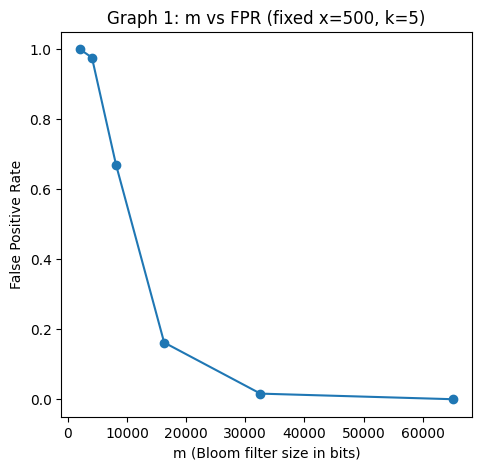

In [ ]:
plt.figure(figsize=(18, 5))
# Graph 1
plt.subplot(1,3,1)
ms = [r['m'] for r in results['graph1']]
fprs = [r['fpr'] for r in results['graph1']]
plt.plot(ms, fprs, marker='o')
plt.xlabel('m (Bloom filter size in bits)')
plt.ylabel('False Positive Rate')
plt.title(f'Graph 1: m vs FPR (fixed x={fixed_params["graph1"]["x"]}, k={fixed_params["graph1"]["k"]})')

Text(0, 0.5, 'False Positive Rate')

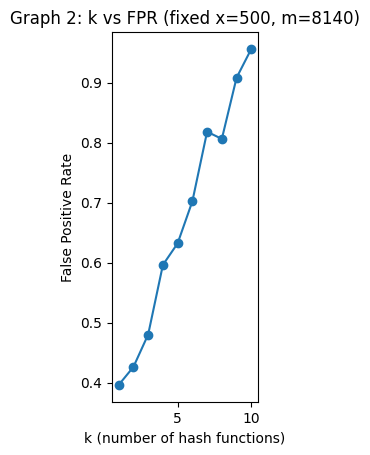

In [ ]:
# Graph 2
plt.subplot(1,3,2)
ks = [r['k'] for r in results['graph2']]
fprs2 = [r['fpr'] for r in results['graph2']]
plt.plot(ks, fprs2, marker='o')
plt.xlabel('k (number of hash functions)')
plt.title(f'Graph 2: k vs FPR (fixed x={fixed_params["graph2"]["x"]}, m={fixed_params["graph2"]["m"]})')
plt.ylabel('False Positive Rate')

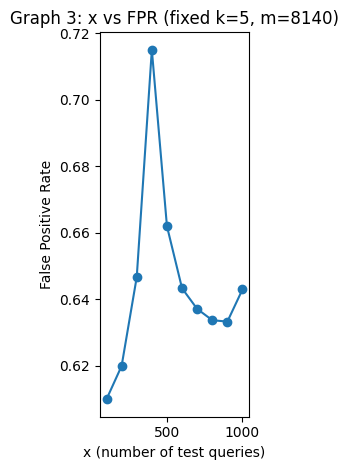

In [ ]:
# Graph 3
plt.subplot(1,3,3)
xs = [r['x'] for r in results['graph3']]
fprs3 = [r['fpr'] for r in results['graph3']]
plt.plot(xs, fprs3, marker='o')
plt.xlabel('x (number of test queries)')
plt.title(f'Graph 3: x vs FPR (fixed k={fixed_params["graph3"]["k"]}, m={fixed_params["graph3"]["m"]})')
plt.ylabel('False Positive Rate')

plt.tight_layout()
plt.show()

In [ ]:
# Print a small results summary (show false negatives to validate sensitivity)
print("Summary of false negatives (must be zero for Bloom filter):")
for g in ['graph1', 'graph2', 'graph3']:
    rows = results[g]
    print(f"\n{g}:")
    for r in rows:
        if g=='graph1':
            print(f" m={r['m']}, k={r['k']}, x={r['x']}, false_neg={r['false_neg']}, fpr={r['fpr']:.4f}")
        elif g=='graph2':
            print(f" m={r['m']}, k={r['k']}, x={r['x']}, false_neg={r['false_neg']}, fpr={r['fpr']:.4f}")
        else:
            print(f" m={r['m']}, k={r['k']}, x={r['x']}, false_neg={r['false_neg']}, fpr={r['fpr']:.4f}")

Summary of false negatives (must be zero for Bloom filter):

graph1:
 m=2035, k=5, x=500, false_neg=0, fpr=1.0000
 m=4070, k=5, x=500, false_neg=0, fpr=0.9760
 m=8140, k=5, x=500, false_neg=0, fpr=0.6700
 m=16280, k=5, x=500, false_neg=0, fpr=0.1620
 m=32560, k=5, x=500, false_neg=0, fpr=0.0160
 m=65120, k=5, x=500, false_neg=0, fpr=0.0000

graph2:
 m=8140, k=1, x=500, false_neg=0, fpr=0.3960
 m=8140, k=2, x=500, false_neg=0, fpr=0.4260
 m=8140, k=3, x=500, false_neg=0, fpr=0.4800
 m=8140, k=4, x=500, false_neg=0, fpr=0.5960
 m=8140, k=5, x=500, false_neg=0, fpr=0.6320
 m=8140, k=6, x=500, false_neg=0, fpr=0.7020
 m=8140, k=7, x=500, false_neg=0, fpr=0.8180
 m=8140, k=8, x=500, false_neg=0, fpr=0.8060
 m=8140, k=9, x=500, false_neg=0, fpr=0.9080
 m=8140, k=10, x=500, false_neg=0, fpr=0.9560

graph3:
 m=8140, k=5, x=100, false_neg=0, fpr=0.6100
 m=8140, k=5, x=200, false_neg=0, fpr=0.6200
 m=8140, k=5, x=300, false_neg=0, fpr=0.6467
 m=8140, k=5, x=400, false_neg=0, fpr=0.7150
 m=8140, 

## Part b)

In [ ]:
def misra_gries(stream, k):
    """
    stream: iterable of items (strings)
    k: parameter (max number of counters)
    Returns: dict of candidate->count (approx counts)
    """
    if k < 1:
        raise ValueError("k must be >= 1")
    counters = dict()
    for item in stream:
        if item in counters:
            counters[item] += 1
        elif len(counters) < k-1:
            counters[item] = 1
        else:
            # decrement all
            remove_list = []
            for key in list(counters.keys()):
                counters[key] -= 1
                if counters[key] == 0:
                    remove_list.append(key)
            for rem in remove_list:
                del counters[rem]
    return counters

In [ ]:
# Exact top-k for comparison
full_counts = Counter(df['StockCode'].tolist())
exact_top_20 = full_counts.most_common(20)
print("\nExact top 20 items (StockCode, count):")
print(exact_top_20[:10])

# Evaluate Misra-Gries for a range of k (we'll test k in [5,10,20,50,100])
mg_results = []
ks_test = [5,10,20,50,100,200]
stream = df['StockCode'].tolist()

for k in ks_test:
    approx = misra_gries(stream, k)
    # approximate counts are <= true counts. But Misra-Gries returns approximate lower-bounds.
    # For evaluation: find top items reported and compare to exact top-k by frequency.
    approx_sorted = sorted(approx.items(), key=lambda x: -x[1])
    approx_top = [item for item,_ in approx_sorted[:k]]
    exact_topk = [item for item,_ in full_counts.most_common(k)]
    # compute accuracy as intersection fraction
    intersection = len(set(approx_top).intersection(set(exact_topk)))
    acc = intersection / k
    # compute error bounds for items in approx: for each reported item, true_count - approx_count <= total_stream_length / k
    bound = len(stream) / k
    # compute average absolute error for reported items
    abs_errs = []
    for item, approx_count in approx_sorted[:k]:
        true = full_counts[item]
        abs_errs.append(true - approx_count)
    mean_abs_err = np.mean(abs_errs) if len(abs_errs)>0 else 0
    mg_results.append({'k':k, 'accuracy': acc, 'bound': bound, 'mean_abs_err': mean_abs_err, 'approx_len': len(approx)})
    print(f"k={k}: accuracy={acc:.3f}, mean_abs_err={mean_abs_err:.2f}, theoretical_bound={bound:.1f}, approx_candidates={len(approx)}")


Exact top 20 items (StockCode, count):
[('85123A', 2313), ('22423', 2203), ('85099B', 2159), ('47566', 1727), ('20725', 1639), ('84879', 1502), ('22720', 1477), ('22197', 1476), ('21212', 1385), ('20727', 1350)]
k=5: accuracy=0.000, mean_abs_err=441.75, theoretical_bound=108381.8, approx_candidates=4
k=10: accuracy=0.000, mean_abs_err=487.00, theoretical_bound=54190.9, approx_candidates=9
k=20: accuracy=0.000, mean_abs_err=487.00, theoretical_bound=27095.5, approx_candidates=9
k=50: accuracy=0.060, mean_abs_err=508.22, theoretical_bound=10838.2, approx_candidates=9
k=100: accuracy=0.050, mean_abs_err=707.44, theoretical_bound=5419.1, approx_candidates=9
k=200: accuracy=0.270, mean_abs_err=444.12, theoretical_bound=2709.5, approx_candidates=166


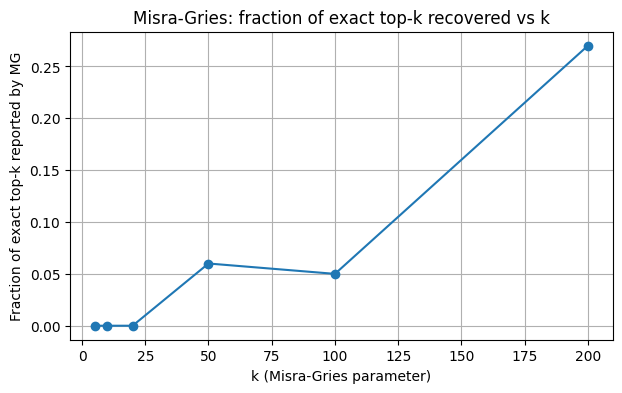


Example (MG with k=50) top approx (item, approx_count):
[('85038', 1), ('22726', 1), ('22727', 1), ('23256', 1), ('22613', 1), ('22899', 1), ('23254', 1), ('23255', 1), ('22138', 1)]

Exact top 10 (item, true_count):
[('85123A', 2313), ('22423', 2203), ('85099B', 2159), ('47566', 1727), ('20725', 1639), ('84879', 1502), ('22720', 1477), ('22197', 1476), ('21212', 1385), ('20727', 1350)]


In [ ]:
# Plot accuracy vs k
plt.figure(figsize=(7,4))
plt.plot([r['k'] for r in mg_results], [r['accuracy'] for r in mg_results], marker='o')
plt.xlabel('k (Misra-Gries parameter)')
plt.ylabel('Fraction of exact top-k reported by MG')
plt.title('Misra-Gries: fraction of exact top-k recovered vs k')
plt.grid(True)
plt.show()

# Show example: exact top 10 vs MG (pick k=50)
chosen_k = 50
approx = misra_gries(stream, chosen_k)
approx_sorted = sorted(approx.items(), key=lambda x: -x[1])[:10]
print("\nExample (MG with k=50) top approx (item, approx_count):")
print(approx_sorted)
print("\nExact top 10 (item, true_count):")
print(full_counts.most_common(10))

# Part-3

In [2]:
from sklearn.datasets import fetch_kddcup99
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.linear_model import LinearRegression
from scipy.sparse import random as sparse_random
from scipy import sparse

import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Load Dataset
# ------------------------------------------------------------
print("Loading KDD Cup 99 FULL Dataset...")
data = fetch_kddcup99(subset=None)
X = data.data
y = data.target

# Filter Numeric Only Attributes
numeric_data = []
for row in X:
    numeric_row = []
    for val in row:
        try:
            numeric_row.append(float(val))
        except:
            pass
    numeric_data.append(numeric_row)

X_num = np.array(numeric_data, dtype=float)
n, d = X_num.shape
print(f"Dataset Loaded: n = {n} samples, d = {d} numeric features")

# Prepare label vector for regression (Part b)
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y).astype(float)

# ------------------------------------------------------------
# Helper functions
# ------------------------------------------------------------

def gaussian_jl_matrix(d, x):
    """Gaussian JL matrix: Normal(0, 1/x)"""
    return np.random.normal(0, 1/np.sqrt(x), size=(d, x))

def sparse_jl_matrix(x, n):
    """Sparse JL matrix as given in class"""
    prob = 1/6
    data = np.random.choice(
        [np.sqrt(3/x), 0, -np.sqrt(3/x)],
        p=[prob, 2*prob, prob],
        size=(x, n)
    )
    return sparse.csr_matrix(data)

def kmeans_cost(D, centers):
    cluster_indices, distances = pairwise_distances_argmin_min(D, centers)
    return np.sum(distances ** 2)


# ------------------------------------------------------------
# Part (a): K-Means in JL space
# ------------------------------------------------------------
x_values_a = [5, 10, 15, 20, 25]
results_a = []

print("\nRunning Part (a) Experiments...")
for x in x_values_a:
    cost_A_list = []
    cost_B_list = []

    for _ in range(5):
        M = gaussian_jl_matrix(d, x)
        E = X_num @ M  # Projected data (n × x)

        kmeans_E = KMeans(n_clusters=15, n_init=10).fit(E)
        A = kmeans_E.cluster_centers_

        kmeans_X = KMeans(n_clusters=15, n_init=10).fit(X_num)
        B = kmeans_X.cluster_centers_

        # Transform A back to original space: Ã = A Mᵀ
        A_tilde = A @ M.T

        cost_A = kmeans_cost(X_num, A_tilde)
        cost_B = kmeans_cost(X_num, B)

        cost_A_list.append(cost_A)
        cost_B_list.append(cost_B)

    results_a.append((x, np.mean(cost_A_list), np.mean(cost_B_list)))

# ------------------------------------------------------------
# Part (b): Linear Regression after Sparse JL Projection
# ------------------------------------------------------------
x_values_b = [25, 50, 100, 200, 500]
results_b = []

print("\nRunning Part (b) Experiments...")
for x in x_values_b:
    loss_A_list = []
    loss_B_list = []

    for _ in range(5):
        M = sparse_jl_matrix(x, n)

        E = M @ X_num  # shape: x × d
        z = M @ y_enc  # shape: x

        reg_A = LinearRegression().fit(E, z)
        a = reg_A.coef_
        loss_A = np.sum((X_num @ a - y_enc) ** 2)

        reg_B = LinearRegression().fit(X_num, y_enc)
        b = reg_B.coef_
        loss_B = np.sum((X_num @ b - y_enc) ** 2)

        loss_A_list.append(loss_A)
        loss_B_list.append(loss_B)

    results_b.append((x, np.mean(loss_A_list), np.mean(loss_B_list)))

# ------------------------------------------------------------
# Print Results
# ------------------------------------------------------------
print("\n=== Part (a) Results: Clustering Cost ===")
print(" x   | cost(D,A)    | cost(D,B)")
for row in results_a:
    print(f"{row[0]:3}  | {row[1]:.2e} | {row[2]:.2e}")

print("\n=== Part (b) Results: Regression Loss ===")
print(" x   | Loss(D,y,a)  | Loss(D,y,b)")
for row in results_b:
    print(f"{row[0]:3}  | {row[1]:.2e} | {row[2]:.2e}")

Loading KDD Cup 99 FULL Dataset...
Dataset Loaded: n = 494021 samples, d = 38 numeric features

Running Part (a) Experiments...

Running Part (b) Experiments...


ValueError: probabilities do not sum to 1